In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Determining whether a course is paid or not

In [170]:
courses = pd.read_csv("udemy_courses.csv",index_col=0)

In [171]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 1070968 to 297602
Data columns (total 11 columns):
course_title           3678 non-null object
url                    3678 non-null object
is_paid                3678 non-null bool
price                  3678 non-null int64
num_subscribers        3678 non-null int64
num_reviews            3678 non-null int64
num_lectures           3678 non-null int64
level                  3678 non-null object
content_duration       3678 non-null float64
published_timestamp    3678 non-null object
subject                3678 non-null object
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 319.7+ KB


In [172]:
courses.head()

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [173]:
courses.drop(labels = ['course_title',
                      'url',
                      'price',
                      'num_reviews',
                      'num_lectures',
                      'published_timestamp'], 
             axis = 1, 
             inplace = True)

In [174]:
courses.head()

,is_paid,num_subscribers,level,content_duration,subject
course_id,,,,,
1070968,True,2147,All Levels,1.5,Business Finance
1113822,True,2792,All Levels,39.0,Business Finance
1006314,True,2174,Intermediate Level,2.5,Business Finance
1210588,True,2451,All Levels,3.0,Business Finance
1011058,True,1276,Intermediate Level,2.0,Business Finance


In [175]:
is_paid = pd.get_dummies(courses['is_paid'],drop_first=True)
level = pd.get_dummies(courses['level'],drop_first=True)
subject = pd.get_dummies(courses['subject'],drop_first=True)

In [176]:
courses.drop(["is_paid","level",'subject'],axis=1,inplace = True)

In [177]:
courses = pd.concat([courses,subject,level,is_paid],axis=1)

In [178]:
courses.head()

,num_subscribers,content_duration,Graphic Design,Musical Instruments,Web Development,Beginner Level,Expert Level,Intermediate Level,True
course_id,,,,,,,,,
1070968,2147,1.5,0,0,0,0,0,0,1
1113822,2792,39.0,0,0,0,0,0,0,1
1006314,2174,2.5,0,0,0,0,0,1,1
1210588,2451,3.0,0,0,0,0,0,0,1
1011058,1276,2.0,0,0,0,0,0,1,1


In [179]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 1070968 to 297602
Data columns (total 9 columns):
num_subscribers        3678 non-null int64
content_duration       3678 non-null float64
Graphic Design         3678 non-null uint8
Musical Instruments    3678 non-null uint8
Web Development        3678 non-null uint8
Beginner Level         3678 non-null uint8
Expert Level           3678 non-null uint8
Intermediate Level     3678 non-null uint8
True                   3678 non-null uint8
dtypes: float64(1), int64(1), uint8(7)
memory usage: 111.3 KB


In [180]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(courses.drop(True,axis=1), 
                                                    courses[True], 
                                                    test_size=0.3, 
                                                    random_state=85)

In [182]:
#Concatenate training data back together
X = pd.concat([X_train, y_train], axis = 1)

In [183]:
X.head()

,num_subscribers,content_duration,Graphic Design,Musical Instruments,Web Development,Beginner Level,Expert Level,Intermediate Level,True
course_id,,,,,,,,,
846210,5351,1.5,0,0,1,1,0,0,0
722754,1699,2.0,0,0,1,0,0,0,1
247558,562,1.0,0,0,0,0,0,0,1
267560,29990,17.5,0,0,1,0,0,0,0
82778,8755,15.5,0,0,1,0,0,0,1


In [184]:
#separate minority and majority classes
trues = X[X[True] == 1]
falses = X[X[True] == 0]

In [185]:
#upsample minority
false_upsampled = resample(falses,replace = True, n_samples = len(trues),random_state=420)

In [201]:
#combine majority and upsampled minority
upsampled = pd.concat([trues,false_upsampled])

In [208]:
upsampled[True].value_counts()

1    2351
0    2351
Name: True, dtype: int64

Logistic regression

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
#Model on non-resampled data
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [190]:
pred = logmodel.predict(X_test)

In [191]:
from sklearn.metrics import classification_report,confusion_matrix

In [192]:
confusion_matrix(y_test, pred)

array([[  13,   74],
       [  14, 1003]], dtype=int64)

In [193]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.48      0.15      0.23        87
           1       0.93      0.99      0.96      1017

   micro avg       0.92      0.92      0.92      1104
   macro avg       0.71      0.57      0.59      1104
weighted avg       0.90      0.92      0.90      1104



In [194]:
#balancing the training data
y_train = upsampled[True]
X_train = upsampled.drop(True,axis=1)

In [195]:
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# Checking accuracy
confusion_matrix(y_test, upsampled_pred)

array([[ 60,  27],
       [144, 873]], dtype=int64)

In [196]:
print(classification_report(y_test,upsampled_pred))

              precision    recall  f1-score   support

           0       0.29      0.69      0.41        87
           1       0.97      0.86      0.91      1017

   micro avg       0.85      0.85      0.85      1104
   macro avg       0.63      0.77      0.66      1104
weighted avg       0.92      0.85      0.87      1104



K-Nearest Neighbours

In [137]:
#Standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(courses.drop(True,axis=1))
scaled_features = scaler.transform(courses.drop(True,axis=1))

C:\Users\Mick4\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mick4\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [165]:
scaled_courses = pd.DataFrame(scaled_features,columns=courses.columns[:-1])
scaled_courses.head()

,num_subscribers,content_duration,Graphic Design,Musical Instruments,Web Development,Beginner Level,Expert Level,Intermediate Level
0,-0.110509,-0.428632,-0.442829,-0.476254,-0.695889,-0.726229,-0.126578,-0.359528
1,-0.042635,5.766625,-0.442829,-0.476254,-0.695889,-0.726229,-0.126578,-0.359528
2,-0.107668,-0.263425,-0.442829,-0.476254,-0.695889,-0.726229,-0.126578,2.781428
3,-0.078519,-0.180822,-0.442829,-0.476254,-0.695889,-0.726229,-0.126578,-0.359528
4,-0.202166,-0.346029,-0.442829,-0.476254,-0.695889,-0.726229,-0.126578,2.781428


In [157]:
scaled_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 8 columns):
num_subscribers        3678 non-null float64
content_duration       3678 non-null float64
Graphic Design         3678 non-null float64
Musical Instruments    3678 non-null float64
Web Development        3678 non-null float64
Beginner Level         3678 non-null float64
Expert Level           3678 non-null float64
Intermediate Level     3678 non-null float64
dtypes: float64(8)
memory usage: 230.0 KB


In [140]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 1070968 to 297602
Data columns (total 9 columns):
num_subscribers        3678 non-null int64
content_duration       3678 non-null float64
Graphic Design         3678 non-null uint8
Musical Instruments    3678 non-null uint8
Web Development        3678 non-null uint8
Beginner Level         3678 non-null uint8
Expert Level           3678 non-null uint8
Intermediate Level     3678 non-null uint8
True                   3678 non-null uint8
dtypes: float64(1), int64(1), uint8(7)
memory usage: 111.3 KB


In [158]:
X_train, X_test, y_train, y_test = train_test_split(scaled_courses, 
                                                    courses[True], 
                                                    test_size=0.3, 
                                                    random_state=85)

In [159]:
len(X_train)

2574

In [160]:
X_train.head()

,num_subscribers,content_duration,Graphic Design,Musical Instruments,Web Development,Beginner Level,Expert Level,Intermediate Level
3545,0.226654,-0.428632,-0.442829,-0.476254,1.437011,1.376976,-0.126578,-0.359528
3296,-0.157653,-0.346029,-0.442829,-0.476254,1.437011,-0.726229,-0.126578,-0.359528
295,-0.277302,-0.511235,-0.442829,-0.476254,-0.695889,-0.726229,-0.126578,-0.359528
2649,2.819462,2.214678,-0.442829,-0.476254,1.437011,-0.726229,-0.126578,-0.359528
2710,0.584863,1.884264,-0.442829,-0.476254,1.437011,-0.726229,-0.126578,-0.359528


In [161]:
len(y_train)

2574

In [145]:
y_train.head()

course_id
846210    0
722754    1
247558    1
267560    0
82778     1
Name: True, dtype: uint8

In [168]:
X = pd.concat([X_train.reset_index(drop=True, inplace=True), y_train], axis = 1)

In [155]:
X_train.head()

""
course_id
722754
247558
82778
405488
53256


In [148]:
trues = X[X[True] == 1]
falses = X[X[True] == 0]
false_upsampled = resample(falses,replace = True, n_samples = len(trues),random_state=420)
upsampled_scaled = pd.concat([trues,false_upsampled])

In [149]:
y_train = upsampled_scaled[True]
X_train = upsampled_scaled.drop(True,axis=1)

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #average of the error rate (i.e. prediction not equal to true value)

ValueError: Found array with 0 feature(s) (shape=(4702, 0)) while a minimum of 1 is required.

Text(0, 0.5, 'Error Rate')

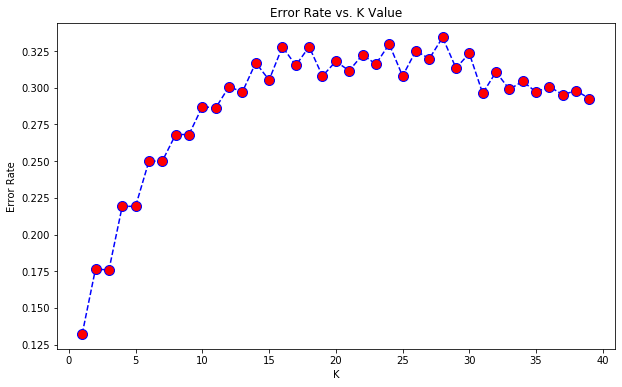

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
#k=1 is the best model
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



[[ 18  69]
 [ 77 940]]


              precision    recall  f1-score   support

           0       0.19      0.21      0.20        87
           1       0.93      0.92      0.93      1017

   micro avg       0.87      0.87      0.87      1104
   macro avg       0.56      0.57      0.56      1104
weighted avg       0.87      0.87      0.87      1104



Decision trees

In [197]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [198]:
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 24  63]
 [ 57 960]]
              precision    recall  f1-score   support

           0       0.30      0.28      0.29        87
           1       0.94      0.94      0.94      1017

   micro avg       0.89      0.89      0.89      1104
   macro avg       0.62      0.61      0.61      1104
weighted avg       0.89      0.89      0.89      1104



In [204]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [205]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 32  55]
 [ 50 967]]
              precision    recall  f1-score   support

           0       0.39      0.37      0.38        87
           1       0.95      0.95      0.95      1017

   micro avg       0.90      0.90      0.90      1104
   macro avg       0.67      0.66      0.66      1104
weighted avg       0.90      0.90      0.90      1104



course_id
722754     1
247558     1
82778      1
405488     1
53256      1
753940     1
907716     1
692722     1
1051570    1
476408     1
1134390    1
287010     1
520302     1
610202     1
743914     1
130168     1
682484     1
1233350    1
294914     1
601092     1
496006     1
585752     1
288110     1
388164     1
502772     1
352782     1
806640     1
1100628    1
181268     1
680046     1
          ..
1114060    0
645202     0
1188742    0
286070     0
645202     0
155640     0
189996     0
283780     0
340844     0
212376     0
806638     0
831170     0
405926     0
774174     0
253810     0
270844     0
737468     0
968026     0
712994     0
1068590    0
1239022    0
1156778    0
645202     0
1106646    0
627782     0
998706     0
937150     0
1028656    0
764076     0
1253224    0
Name: True, Length: 4702, dtype: uint8